# Library Used


In [104]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import pickle 
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
data=pd.read_csv("text_data.csv",encoding='latin1')

In [50]:
data=data.drop('S. No.',axis=1)

In [51]:
data

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


# Procedure 

1.Data Cleaning 

2.EDA

3.Text preprocessing

4.Model Building 

5.Evaluation

6.Model Deployement on Heroku using Flask 

In [52]:
Encoding=LabelEncoder()
data['Label']=Encoding.fit_transform(data['Label'])

Spam is indicated as -> 1

Non-Spam is indicated as -> 0

In [53]:
data.isnull().sum()

Message_body    0
Label           0
dtype: int64

No missing Values


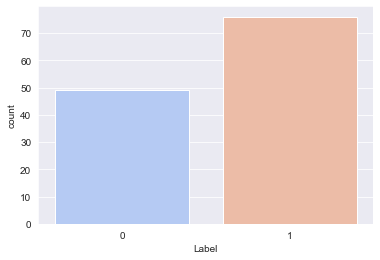

In [54]:
sns.countplot(x='Label',data=data,palette='coolwarm')
sns.set_style('darkgrid')

In [55]:
data['number of Char']=data['Message_body'].apply(len)

In [56]:
data['No. of Words']=data['Message_body'].apply(lambda x :len(nltk.word_tokenize(x)))

In [57]:
data['No of Sentences']=data['Message_body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [58]:
data

,Message_body,Label,number of Char,No. of Words,No of Sentences
0,"UpgrdCentre Orange customer, you may now claim...",1,175,37,5
1,"Loan for any purpose £500 - £75,000. Homeowner...",1,162,33,5
2,Congrats! Nokia 3650 video camera phone is you...,1,157,27,2
3,URGENT! Your Mobile number has been awarded wi...,1,136,26,5
4,Someone has contacted our dating service and e...,1,162,28,3
...,...,...,...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,0,151,33,1
121,Try to do something dear. You read something f...,0,54,11,2
122,Sun ah... Thk mayb can if dun have anythin on....,0,120,29,1
123,"SYMPTOMS when U are in love: ""1.U like listeni...",0,137,30,1


In [59]:
data[['number of Char','No. of Words','No of Sentences']].describe()

,number of Char,No. of Words,No of Sentences
count,125.000000,125.000000,125.00000
mean,119.464000,25.584000,2.72800
std,47.863136,10.163331,1.67224
min,22.000000,5.000000,1.00000
25%,78.000000,21.000000,1.00000
50%,142.000000,28.000000,2.00000
75%,156.000000,32.000000,4.00000
max,229.000000,60.000000,7.00000


There are messages where number of char is as high as 229.

<AxesSubplot:xlabel='number of Char', ylabel='Count'>

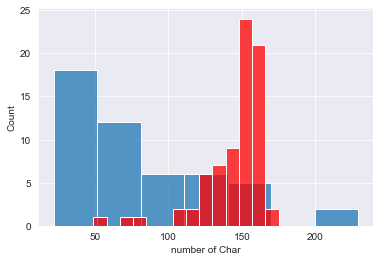

In [60]:
sns.histplot(data[data['Label']==0]['number of Char'])
sns.histplot(data[data['Label']==1]['number of Char'],color='red')

<AxesSubplot:xlabel='No. of Words', ylabel='Count'>

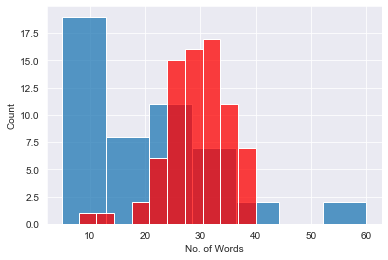

In [61]:
sns.histplot(data[data['Label']==0]['No. of Words'])
sns.histplot(data[data['Label']==1]['No. of Words'],color='red')

By comparing the above plots we can see that spam messages tend to have more no of words as well as char.

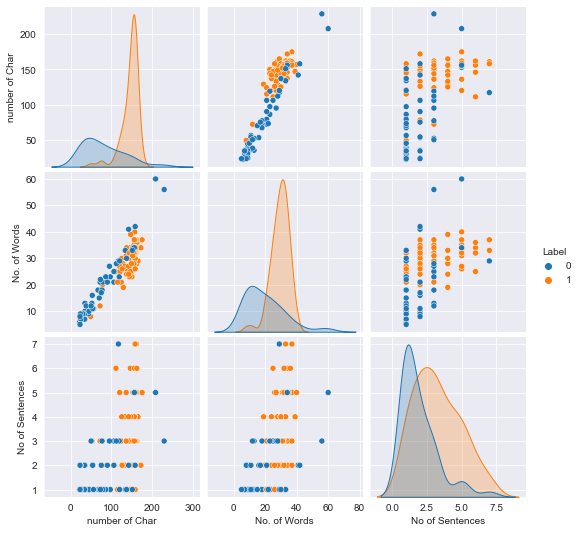

In [62]:
sns.pairplot(data,hue='Label')

<AxesSubplot:>

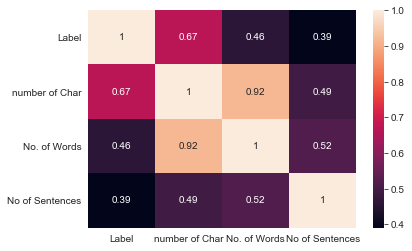

In [63]:
 sns.heatmap(data.corr(),annot=True)

In [64]:
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

Example :

In [65]:
transform('Hi $$$ how are you rahul rao nice to meet you **%$')

'hi rahul rao nice meet'

In [66]:
ps=PorterStemmer()

In [67]:
data['Transformed_message']=data['Message_body'].apply(transform)

In [85]:
wc=WordCloud(width=2000,height=2000,min_font_size=20,background_color='black')
spam_wc=wc.generate(data[data['Label']==1]['Transformed_message'].str.cat(sep=' '))

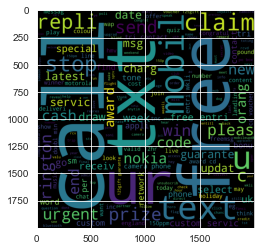

In [86]:
plt.imshow(spam_wc)

In [87]:
Non_spam=wc.generate(data[data['Label']==0]['Transformed_message'].str.cat(sep='  '))

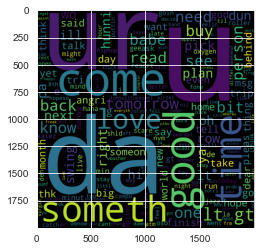

In [88]:
plt.imshow(Non_spam)

Top words in Spam are :

1.claim

2.Free

3.reply

4.prize

# Converting text data into Vector form using  BOW

In [90]:
cv=CountVectorizer()

In [93]:
X=cv.fit_transform(data['Transformed_message']).toarray()

In [97]:
X.shape

(125, 830)

In [98]:
y=data['Label'].values

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [105]:
mnb=MultinomialNB()

In [110]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print("Accuracy is=",accuracy_score(y_test,y_pred))
print("Precision is=",precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is= 0.96
Precision is= 1.0
[[ 5  0]
 [ 1 19]]


<AxesSubplot:>

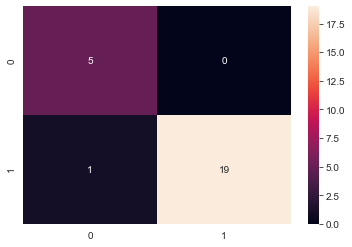

In [111]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

False Positive = 0 (which is really good)

True Positive =19

True Negative = 5 

Only one wrong classification 

In [112]:
pickle.dump('cv',open('vectorizer.pkl','wb'))
pickle.dump('mnb',open('spammodel.pkl','wb'))